In [1]:
#import pandas library
import pandas as pd

In [2]:
#import IBM dataset
data=pd.read_csv('C:/Users/good/Desktop/Simplilearn/project_data/IBM Attrition Data.csv')

In [3]:
#regroup the Age feature into ranges of age
age_grp=pd.cut(data['Age'], bins=[17,20,30,40,50,60], labels=['20 and below','21-30','31-40','41-50','51-60'])

In [4]:
#find distribution of age ranges
age_grp.value_counts()

31-40           619
21-30           358
41-50           322
51-60           143
20 and below     28
Name: Age, dtype: int64

In [5]:
#create dataframe of the distribution of age ranges
new_data=pd.DataFrame({'Age group':['20 and below','21-30','31-40','41-50','51-60'], 'Frequency':[28,358,619,322,143]})

In [6]:
#find the percentile of the distribution
per=new_data['Frequency'].apply([lambda x: (x/1470)*100])

In [7]:
#add new column of percentile to the dataframe
new_data['percentile']=per

In [8]:
new_data

,Age group,Frequency,percentile
0,20 and below,28,1.904762
1,21-30,358,24.353741
2,31-40,619,42.108844
3,41-50,322,21.904762
4,51-60,143,9.727891


In [9]:
#import matplotlib to visualize the age range distribution
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

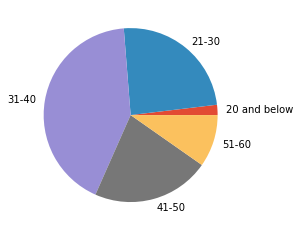

In [10]:
style.use('ggplot')
plt.pie(new_data['percentile'], labels= new_data['Age group'])
plt.show()

In [11]:
age_grp

0       41-50
1       41-50
2       31-40
3       31-40
4       21-30
        ...  
1465    31-40
1466    31-40
1467    21-30
1468    41-50
1469    31-40
Name: Age, Length: 1470, dtype: category
Categories (5, object): ['20 and below' < '21-30' < '31-40' < '41-50' < '51-60']

In [12]:
#replace the Age column in the IBM dataset with the list of age range
data['Age']=age_grp

In [13]:
#group the dataset based on Attrition feature and find the distribution of the age range for each group
att_grp=data.groupby('Attrition')
yes_grp= att_grp.get_group('Yes')
yes_grp['Age'].value_counts()

31-40           85
21-30           84
41-50           34
51-60           18
20 and below    16
Name: Age, dtype: int64

In [14]:
no_grp= att_grp.get_group('No')
no_grp['Age'].value_counts()

31-40           534
41-50           288
21-30           274
51-60           125
20 and below     12
Name: Age, dtype: int64

In [15]:
#data of left employees
no_grp.shape

(1233, 13)

In [16]:
#find the distribution of dataset based on Education Field of employees
edu_grp=data.groupby('EducationField')
for group in edu_grp:
    print(group)

('Human Resources',         Age Attrition       Department  DistanceFromHome  Education  \
100   31-40       Yes  Human Resources                 6          4   
105   51-60        No  Human Resources                 2          4   
112   51-60        No  Human Resources                26          3   
139   21-30        No  Human Resources                 9          3   
310   31-40        No  Human Resources                 2          3   
440   31-40       Yes  Human Resources                23          3   
535   41-50        No  Human Resources                10          4   
538   41-50        No  Human Resources                 1          3   
551   31-40        No  Human Resources                 3          3   
599   31-40        No  Human Resources                13          3   
613   31-40        No  Human Resources                 3          2   
655   31-40        No  Human Resources                 3          2   
826   31-40        No  Human Resources                 1 

In [17]:
#find the distribution of the marital status
data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [18]:
marital_stat = pd.DataFrame({'Marital Status':['Married','Unmarried'],'Distribution':[673,797]})

In [19]:
marital_stat

,Marital Status,Distribution
0,Married,673
1,Unmarried,797


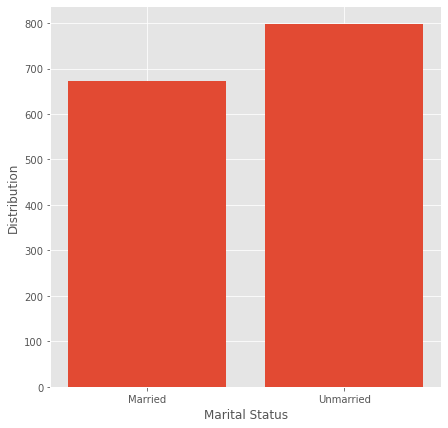

In [20]:
#plot bar chart of the marital status of the employees
plt.figure(figsize=(7,7))
plt.bar(marital_stat['Marital Status'],marital_stat['Distribution'])
plt.xlabel('Marital Status')
plt.ylabel('Distribution')
plt.show()

In [21]:
data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [80]:
data=pd.read_csv('C:/Users/good/Desktop/Simplilearn/project_data/IBM Attrition Data.csv')
data['Attrition'].replace('Yes',1, inplace=True)
data['Attrition'].replace('No',0, inplace=True)

In [81]:
data['Department'].replace('Human Resources',0, inplace=True)
data['Department'].replace('Sales',1, inplace=True)
data['Department'].replace('Research & Development',2, inplace=True)

In [82]:
data['MaritalStatus'].replace('Single',0,inplace=True)
data['MaritalStatus'].replace('Married',1,inplace=True)
data['MaritalStatus'].replace('Divorced',2,inplace=True)

data['EducationField'].replace('Human Resources',0,inplace=True)
data['EducationField'].replace('Other',1,inplace=True)
data['EducationField'].replace('Technical Degree',2,inplace=True)
data['EducationField'].replace('Marketing',3,inplace=True)
data['EducationField'].replace('Medical',4,inplace=True)
data['EducationField'].replace('Life Sciences',5,inplace=True)

data.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [83]:
#build logistic regression model to predict which employee will likely attrite
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [108]:
feature=data[['Age','Attrition', 'Department', 'DistanceFromHome', 'Education','EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance', 'YearsAtCompany']]
target=data['Attrition']
x_train,x_test,y_train,y_test= train_test_split(feature,target)

In [109]:
logreg.fit(x_train,y_train)

C:\Users\Dullard_boy\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
y_pred=logreg.predict(x_test)

In [111]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [112]:
#find the accuracy score
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.904891304347826

In [113]:
metrics.roc_auc_score(y_test, y_pred)

0.7033139274518585

In [114]:
metrics.confusion_matrix(y_test,y_pred)

array([[312,   7],
       [ 28,  21]], dtype=int64)

In [115]:
metrics.classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95       319\n           1       0.75      0.43      0.55        49\n\n    accuracy                           0.90       368\n   macro avg       0.83      0.70      0.75       368\nweighted avg       0.90      0.90      0.89       368\n'

In [116]:
probs=logreg.predict_proba(x_test)

In [117]:
probs

array([[0.95501764, 0.04498236],
       [0.98333597, 0.01666403],
       [0.99701532, 0.00298468],
       [0.42180291, 0.57819709],
       [0.95966861, 0.04033139],
       [0.91478283, 0.08521717],
       [0.72987494, 0.27012506],
       [0.99788068, 0.00211932],
       [0.93930234, 0.06069766],
       [0.96320468, 0.03679532],
       [0.94918105, 0.05081895],
       [0.95905313, 0.04094687],
       [0.97143537, 0.02856463],
       [0.91596997, 0.08403003],
       [0.99217511, 0.00782489],
       [0.95728421, 0.04271579],
       [0.83209779, 0.16790221],
       [0.78920349, 0.21079651],
       [0.88542035, 0.11457965],
       [0.99115856, 0.00884144],
       [0.94667924, 0.05332076],
       [0.9857983 , 0.0142017 ],
       [0.97939758, 0.02060242],
       [0.88682249, 0.11317751],
       [0.93857296, 0.06142704],
       [0.80855954, 0.19144046],
       [0.89838132, 0.10161868],
       [0.96427951, 0.03572049],
       [0.9410045 , 0.0589955 ],
       [0.9822791 , 0.0177209 ],
       [0.